<a href="https://colab.research.google.com/github/Mung-Tamjung/PETECTIVE-ai/blob/main/training_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -L "https://public.roboflow.com/ds/lzyPxm1aUB?key=kflCqCftM3" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train/images/great_pyrenees_132_jpg.rf.800d51c43d747fdcaf82a30c02ce3ac0.jpg  
 extracting: train/images/great_pyrenees_133_jpg.rf.de687495f799e912fa3bf062f1b191fc.jpg  
 extracting: train/images/great_pyrenees_134_jpg.rf.73928d8e543f08e3214e8d17eedc5d07.jpg  
 extracting: train/images/great_pyrenees_137_jpg.rf.75f8f9c03d5cf63155db65d6ed0abec6.jpg  
 extracting: train/images/great_pyrenees_139_jpg.rf.9caa33dae92ad79525cc79b8499b96dd.jpg  
 extracting: train/images/great_pyrenees_13_jpg.rf.d5005cbe22fdc76e5ea9bf9f04248ed0.jpg  
 extracting: train/images/great_pyrenees_140_jpg.rf.061fb241cf9bc07e06ce50e43b592fb1.jpg  
 extracting: train/images/great_pyrenees_141_jpg.rf.217606fcf6e2c3163df836eb231fc613.jpg  
 extracting: train/images/great_pyrenees_146_jpg.rf.ed16e26843411835e727733d9c7a9c40.jpg  
 extracting: train/images/great_pyrenees_147_jpg.rf.e43e860d5f8ee6d0199a5f593e95ad35.jpg  
 extracting: train/images/great_pyrenees_149_jpg.rf.820

In [2]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16582, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 16582 (delta 30), reused 39 (delta 18), pack-reused 16522
Receiving objects: 100% (16582/16582), 15.06 MiB | 27.49 MiB/s, done.
Resolving deltas: 100% (11389/11389), done.


In [1]:
%cd yolov5
! pip install -r requirements.txt

/content/yolov5


In [2]:
!python train.py --img 320 --batch 16 --epochs 50 --data /content/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name breed_training_result

2024-05-11 10:39:05.512032: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-11 10:39:05.512090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-11 10:39:05.513494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp -r /content/yolov5/runs/train/breed_training_result /content/drive/MyDrive/Mung_Tamjung

In [5]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/breed_training_result/weights/best.pt --img 320 --conf 0.5 --source /content/drive/MyDrive/Mung_Tamjung/testimage.jpeg

detect: weights=['/content/yolov5/runs/train/breed_training_result/weights/best.pt'], source=/content/drive/MyDrive/Mung_Tamjung/testimage.jpeg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-307-g920c721e Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7109914 parameters, 0 gradients, 16.1 GFLOPs
image 1/1 /content/drive/MyDrive/Mung_Tamjung/testimage.jpeg: 320x320 1 dog-chihuahua, 6.5ms
Speed: 0.5ms pre-process, 6.5ms inference, 505.0ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/detect/exp


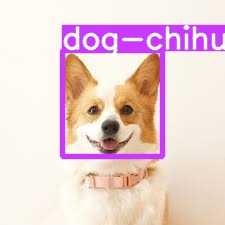

In [6]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/yolov5/runs/detect/exp/testimage.jpeg')
cv2_imshow(img)